In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale



In [2]:
digits = load_digits()
data = scale(digits.data)

n_samples, n_features = data.shape
n_digits = len(np.unique(digits.target))
labels = digits.target


In [4]:
sample_size = 50

print("n_digits: %d, \t n_samples %d, \t n_features %d"
      % (n_digits, n_samples, n_features))

n_digits: 10, 	 n_samples 1797, 	 n_features 64


In [7]:

def bench_k_means(estimator, name, data):
    t0 = time()
    estimator.fit(data)
    print('% 9s   %.2fs    %i   %.3f   %.3f   %.3f   %.3f    %.3f'
          % (name, (time() - t0), estimator.inertia_,
             metrics.homogeneity_score(labels, estimator.labels_),
             metrics.completeness_score(labels, estimator.labels_),
             metrics.v_measure_score(labels, estimator.labels_),
             metrics.adjusted_rand_score(labels, estimator.labels_),
             metrics.silhouette_score(data, estimator.labels_,
                                      metric='euclidean',
                                      sample_size=sample_size)))

In [29]:
pca = PCA(n_components=n_digits).fit(data)
print(73 * '_')
print('% 9s' % 'init'
      '         time   inertia   homo   compl   v-meas   ARI     silhouette')
bench_k_means(KMeans(init=pca.components_, n_clusters=10),
              name="PCA-based",
              data=data)
print(73 * '_')

_________________________________________________________________________
init         time   inertia   homo   compl   v-meas   ARI     silhouette
PCA-based   0.02s    70769   0.669   0.696   0.683   0.558    0.110
_________________________________________________________________________


d:\VScode\Test_env\test_new\lib\site-packages\sklearn\cluster\_kmeans.py:1146: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


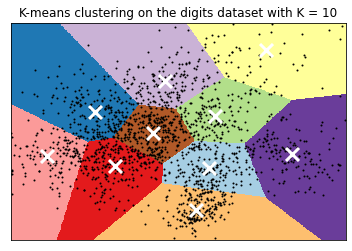

In [32]:
reduced_data = PCA(n_components=2).fit_transform(data)
kmeans = KMeans(init='k-means++', n_clusters=10, n_init=10)
kmeans.fit(reduced_data)

h = .03     # point in the mesh [x_min, m_max]x[y_min, y_max].

x_min, x_max = reduced_data[:, 0].min() + 1, reduced_data[:, 0].max() - 3
y_min, y_max = reduced_data[:, 1].min() + 1, reduced_data[:, 1].max() - 3
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the digits dataset with K = 10')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [33]:
centroids

array([[ 1.69285390e+00, -1.53052325e+00],
       [-2.71664118e+00,  1.70564589e+00],
       [ 1.94085548e+00,  1.48005338e+00],
       [-4.59677416e+00, -8.35021487e-01],
       [-1.94744090e+00, -1.39272986e+00],
       [ 1.20275222e+00, -3.95515693e+00],
       [-1.81855802e-03,  3.48144482e+00],
       [ 4.91573760e+00, -6.85785271e-01],
       [ 3.88788124e+00,  5.31428305e+00],
       [-4.76971317e-01,  5.30442228e-01]])

In [34]:
import pandas as pd